In [1]:
# Antonio Jose Patiño Torres, T00056470. 24/11/2021

import numpy as np
import pandas as pd

In [2]:
import sklearn
from sklearn import preprocessing
from sklearn import svm
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
train = pd.read_csv("train.csv")
test_raw = pd.read_csv("test.csv")
test = test_raw
train_raw = train

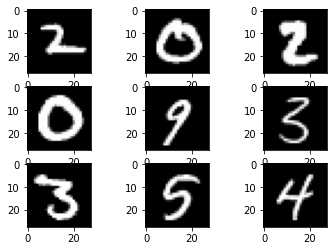

In [4]:
for i in range(9):
    k = random.randint(1, 50)
    img = np.asarray(train.iloc[k,1:].values.reshape((28,28))/255)
    ax=plt.subplot(3, 3, i+1)
    ax.grid(False)
    plt.imshow(img, cmap='gray')
    
plt.show()

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_y = train["label"]
train_x = train.drop(labels = ["label"], axis = 1)

train_x = train_x / 255.0
test = test / 255.0

train_x = train_x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

train_y = pd.get_dummies(train_y)


In [7]:
test_raw

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


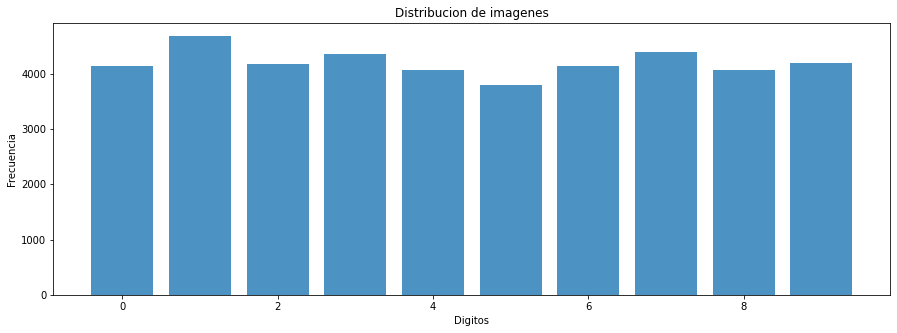

In [41]:
type(train_raw)
frecuencias = train_raw.groupby("label", as_index=False)['label'].count()
frecuencias
frecuencias.index.tolist()
frecuencias["label"].values.tolist()
plt.figure(figsize=(15,5))
plt.bar(frecuencias.index.tolist(), frecuencias["label"].values.tolist(), alpha=0.8)
plt.title('Distribucion de imagenes')
plt.ylabel('Frecuencia', fontsize=10)
plt.xlabel('Digitos', fontsize=10)
plt.show()

In [42]:
model = keras.models.Sequential([
    keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [44]:
early_stopping =  keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model_result = model.fit(train_x, train_y, batch_size=32, epochs=100, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

Epoch 1/100
1050/1050 [==============================] - 35s 31ms/step - loss: 0.2126 - accuracy: 0.9342 - val_loss: 0.0675 - val_accuracy: 0.9805
Epoch 2/100
1050/1050 [==============================] - 32s 30ms/step - loss: 0.1291 - accuracy: 0.9615 - val_loss: 0.0651 - val_accuracy: 0.9804
Epoch 3/100
1050/1050 [==============================] - 32s 30ms/step - loss: 0.1234 - accuracy: 0.9637 - val_loss: 0.0605 - val_accuracy: 0.9823
Epoch 4/100
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1198 - accuracy: 0.9648 - val_loss: 0.0631 - val_accuracy: 0.9843
Epoch 5/100
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1134 - accuracy: 0.9669 - val_loss: 0.0611 - val_accuracy: 0.9843
Epoch 6/100
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1199 - accuracy: 0.9665 - val_loss: 0.1006 - val_accuracy: 0.9746
Epoch 7/100
1050/1050 [==============================] - 33s 31ms/step - loss: 0.1097 - accuracy: 0.9690 - val_loss: 0

In [45]:
preds = model.predict(test)
preds = np.argmax(preds,axis = 1)

In [53]:
resultado = pd.DataFrame({'Id imagen': test_raw.index, 'Label': preds})

In [54]:
resultado

,Id imagen,Label
0,0,2
1,1,0
2,2,9
3,3,9
4,4,3
...,...,...
27995,27995,9
27996,27996,7
27997,27997,3
27998,27998,9


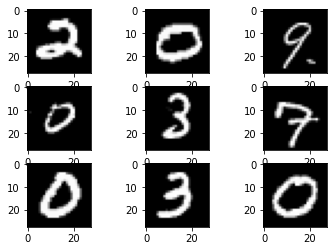

In [55]:
for i in range(9):
    img = np.asarray(test_raw.iloc[i].values.reshape((28,28))/255);
    ax=plt.subplot(3, 3, i+1)
    ax.grid(False)
    plt.imshow(img, cmap='gray')
    
plt.show()

In [72]:
test_raw.iloc[i]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 8, Length: 784, dtype: int64

In [71]:
test_raw

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.linear_model import LogisticRegression

In [ ]:
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs", C = 10, max_iter=10000)
softmax.fit(train_x.tolist(), train_y)

In [52]:
type(test)

numpy.ndarray